# Bigram Character Model
## Attribution
Note that this bigram notebook is based *very heavily* on 
Andrej Karpathy's "makemore" aka NN-Zero-to-Hero code and videos. All
credit goes to him.

You can find his repo for the birgram notebook here:
https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part1_bigrams.ipynb
as well as the makemore repo here:
https://github.com/karpathy/makemore
in particular we use his names file found here:
https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

His video is extremely excellent and can be found here:
https://www.youtube.com/watch?v=PaCmpygFfXo

Refer to his LICENSE file in this folder.

## Starting with a purely statistical model
- Set some display properties
- Load in the names and look at some properties of them

In [ ]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

import torch

torch.set_printoptions(linewidth=230)

myseed = 12345


In [ ]:
words = open("names.txt", "r").read().splitlines()


In [ ]:
words[:10]


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [ ]:
len(words)


32033

In [ ]:
min(len(w) for w in words)


2

In [ ]:
max(len(w) for w in words)


15

## Create bigrams
Now let's find all bigrams for each name.
- Find all pairs of characters (bigrams) for each name
- We add in the special character '.' which we use to indicate the start and stop of a word
- Look at some examples and stats

In [ ]:
b = {}
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1


In [ ]:
list(b.items())


[(('.', 'e'), 1531),
 (('e', 'm'), 769),
 (('m', 'm'), 168),
 (('m', 'a'), 2590),
 (('a', '.'), 6640),
 (('.', 'o'), 394),
 (('o', 'l'), 619),
 (('l', 'i'), 2480),
 (('i', 'v'), 269),
 (('v', 'i'), 911),
 (('i', 'a'), 2445),
 (('.', 'a'), 4410),
 (('a', 'v'), 834),
 (('v', 'a'), 642),
 (('.', 'i'), 591),
 (('i', 's'), 1316),
 (('s', 'a'), 1201),
 (('a', 'b'), 541),
 (('b', 'e'), 655),
 (('e', 'l'), 3248),
 (('l', 'l'), 1345),
 (('l', 'a'), 2623),
 (('.', 's'), 2055),
 (('s', 'o'), 531),
 (('o', 'p'), 95),
 (('p', 'h'), 204),
 (('h', 'i'), 729),
 (('.', 'c'), 1542),
 (('c', 'h'), 664),
 (('h', 'a'), 2244),
 (('a', 'r'), 3264),
 (('r', 'l'), 413),
 (('l', 'o'), 692),
 (('o', 't'), 118),
 (('t', 't'), 374),
 (('t', 'e'), 716),
 (('e', '.'), 3983),
 (('.', 'm'), 2538),
 (('m', 'i'), 1256),
 (('a', 'm'), 1634),
 (('m', 'e'), 818),
 (('.', 'h'), 874),
 (('r', 'p'), 14),
 (('p', 'e'), 197),
 (('e', 'r'), 1958),
 (('r', '.'), 1377),
 (('e', 'v'), 463),
 (('v', 'e'), 568),
 (('l', 'y'), 1588),


In [ ]:
sorted(b.items(), key=lambda kv: -kv[1])


[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

## Introducing: Tensors
Tensors are multidimensional arrays. PyTorch implements tensors and we can use them for the purpose of speed, efficiency, and convenience.
- How can we create and work with them?

In [ ]:
play = torch.zeros((3, 8), dtype=torch.int32)
play


tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]], dtype=torch.int32)

In [ ]:
play[1, 6] = 99
play


tensor([[ 0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0, 99,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0]], dtype=torch.int32)

In [ ]:
N = torch.zeros((27, 27), dtype=torch.int32)


Tensors store numbers, not letters. We need to create a mapping between the letters of the alphabet and indices (numbers).

In [ ]:
chars = sorted(list(set("".join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}


In [ ]:
stoi["r"]


18

In [ ]:
itos[18]


'r'

## Statistics
If we had the exact probability of a bigram occuring, we could use this to create the best model possible. Actually we do have that! Just count each occurence and divide by the total number. Let's start with counts:

In [187]:
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1


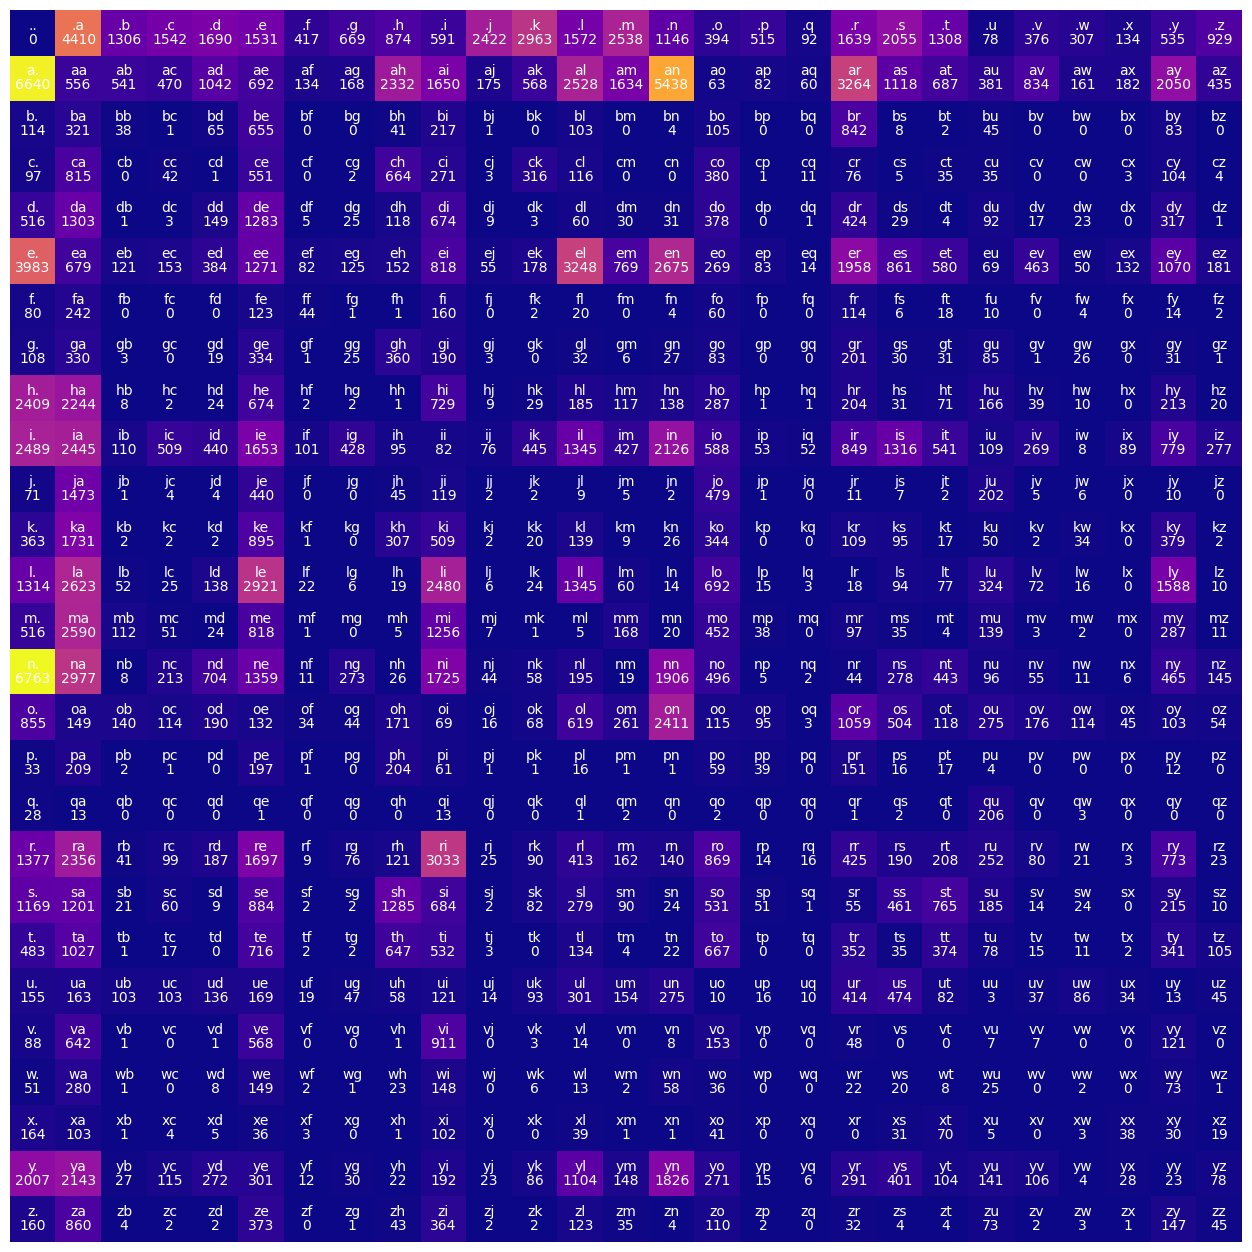

In [188]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='plasma')  #, norm=mpl.colors.LogNorm(vmin=1, vmax=N.max().item()))
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='w')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='w')
plt.axis('off');


We want to be able to sample a probability distribution, not counts! Let's look at the first row of our counts table and create probabilities from it. Then we'll see how we can sample this distribution.

In [189]:
# First column in table
N[:, 0]


tensor([   0, 6640,  114,   97,  516, 3983,   80,  108, 2409, 2489,   71,  363, 1314,  516, 6763,  855,   33,   28, 1377, 1169,  483,  155,   88,   51,  164, 2007,  160], dtype=torch.int32)

In [190]:
# Creating probability distribution
p = N[:, 0].float()
p = p / p.sum()
p


tensor([0.00, 0.21, 0.00, 0.00, 0.02, 0.12, 0.00, 0.00, 0.08, 0.08, 0.00, 0.01, 0.04, 0.02, 0.21, 0.03, 0.00, 0.00, 0.04, 0.04, 0.02, 0.00, 0.00, 0.00, 0.01, 0.06, 0.00])

In [191]:
# This should be 1 i.e. all probabilites added should be 100%
p.sum()


tensor(1.)

In [192]:
# We can sample the prob distribution using "mulitnomial()"
g = torch.Generator().manual_seed(myseed)
torch.multinomial(p, num_samples=100, replacement=True, generator=g)


tensor([18, 25, 14, 25, 14, 14,  5, 14, 14,  9,  5, 14,  1, 26, 14,  5,  9,  4, 14,  1, 14,  5, 14, 15,  8,  8, 14,  5, 14,  1, 25,  1, 18, 12,  1, 14,  7,  8,  1,  9, 25,  9,  5, 12,  8, 18, 14, 15,  1, 14,  8, 12, 12, 19,  5,
        13, 14, 15, 25, 23,  1,  1,  1, 14, 14,  1, 14, 14,  1, 12,  9, 14,  1, 14,  1,  1, 14, 14,  1,  1,  1,  1,  1,  5, 10,  5,  1,  1, 25, 19,  8,  1, 14,  8, 15,  1,  5,  8,  5,  9])

## Sampling the next letter 
Let's apply our computed probability to sample the first letter of a name. How would we sample the next letter?

In [193]:
# We are working with just the first row of our table: the start of a name
p = N[0].float()
p = p / p.sum()

# Now use this probability
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]


'n'

## Putting it all together
Believe it or not we are almost done. We just need to calculate probabilities for all rows, not just the first. Then we sample over and over until we hit an end character.

In [194]:
# add smoothing
P = (N + 1).float()

# Compute probability distribution for every row
P /= P.sum(1, keepdims=True)


In [195]:
P.shape


torch.Size([27, 27])

In [196]:
torch.set_printoptions(precision=2)
torch.set_printoptions(sci_mode=False)

arr = P
arr = arr.round(decimals=3)
print(arr * 100)


tensor([[ 0.00, 13.80,  4.10,  4.80,  5.30,  4.80,  1.30,  2.10,  2.70,  1.80,  7.60,  9.20,  4.90,  7.90,  3.60,  1.20,  1.60,  0.30,  5.10,  6.40,  4.10,  0.20,  1.20,  1.00,  0.40,  1.70,  2.90],
        [19.60,  1.60,  1.60,  1.40,  3.10,  2.00,  0.40,  0.50,  6.90,  4.90,  0.50,  1.70,  7.50,  4.80, 16.00,  0.20,  0.20,  0.20,  9.60,  3.30,  2.00,  1.10,  2.50,  0.50,  0.50,  6.00,  1.30],
        [ 4.30, 12.10,  1.50,  0.10,  2.50, 24.60,  0.00,  0.00,  1.60,  8.20,  0.10,  0.00,  3.90,  0.00,  0.20,  4.00,  0.00,  0.00, 31.50,  0.30,  0.10,  1.70,  0.00,  0.00,  0.00,  3.10,  0.00],
        [ 2.80, 22.90,  0.00,  1.20,  0.10, 15.50,  0.00,  0.10, 18.70,  7.60,  0.10,  8.90,  3.30,  0.00,  0.00, 10.70,  0.10,  0.30,  2.20,  0.20,  1.00,  1.00,  0.00,  0.00,  0.10,  3.00,  0.10],
        [ 9.40, 23.60,  0.00,  0.10,  2.70, 23.20,  0.10,  0.50,  2.20, 12.20,  0.20,  0.10,  1.10,  0.60,  0.60,  6.90,  0.00,  0.00,  7.70,  0.50,  0.10,  1.70,  0.30,  0.40,  0.00,  5.80,  0.00],
     

In [197]:
P[0].sum()


tensor(1.)

## Activity

Generate 5 names using the computed bigram probability distribution.
- Hint: What do all names start with?
- Hint: Given a character, how do you predict the next character?
- Hint: What does every name end with? What should happen after a name ends?

Don't be afraid to copy and paste code that does what you need from our work above.

In [198]:
g = torch.Generator().manual_seed(myseed)


In [199]:
# We are working with just the first row of our table: the start of a name
name_1 = []
for i in range(5):

    out = []
    ix = 0
    while True:
        p = P[ix]
        # Sample from the probability distribution
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 5:
            break
    print("".join(out))


s.te
pian.n.t.n.ionan.kyryann.dinas.r.dan.jh.te
t.cly.sorka.chan.sibria.braratrylyn.gd.h.se
wahe
pacie


In [200]:
name_1


[]

In [201]:
N[0].float()


tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591., 2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055., 1308.,   78.,  376.,  307.,  134.,  535.,  929.])

## Answer
To see the answer, run the cell below

In [202]:
# %load answer1.txt
g = torch.Generator().manual_seed(myseed)

for i in range(5):

    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))


s.
teinan.
n.
t.
n.


## Sanity Check
Do we believe the results we got? What if we compare it to a "random" model (flat distribution)?

In [203]:
P2 = torch.ones((27, 27), dtype=torch.float32)
P2 /= P2.sum(1, keepdims=True)
P2


tensor([[0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,

Now use this flat distribution to generate names. What do you need to modify? How do these new names compare to our bigram results?

In [204]:
# %load answer1.txt
g = torch.Generator().manual_seed(myseed)

for i in range(5):

    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))


s.
teinan.
n.
t.
n.


## Next steps
* How well did we do?
* How can we quantitatively measure the quality of our model?
* Is this the best a bigram model can be?
* How could we improve if we moved away from a bigram model?
* How might our current approach face difficulties if we applied it to other models?

## GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)

Likelihood: chance of getting a particular name. <br>
*(This is the product of each of the chances to get each bigram)*

* equivalent to maximizing the log likelihood (because log is monotonic) <br>
* equivalent to minimizing the negative log likelihood
* equivalent to minimizing the average negative log likelihood

*Why log? Product of many [0,1]'s will give very small product.* <br>
`log(a*b*c) = log(a) + log(b) + log(c)`

In [205]:
log_likelihood = 0.0
n = 0

# for w in words:
for w in ["josh"]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f"{log_likelihood=}")
nll = -log_likelihood
print(f"{nll=}")
print(f"{nll/n}")


log_likelihood=tensor(-10.15)
nll=tensor(10.15)
2.029371738433838


We have derived a "loss" function. How large can this loss be? How small can this loss be?

In [206]:
torch.log(torch.tensor(1))


tensor(0.)

In [207]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


. e
e m
m m
m a
a .


In [208]:
xs


tensor([ 0,  5, 13, 13,  1])

In [209]:
ys


tensor([ 5, 13, 13,  1,  0])

In [210]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc


tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [211]:
xenc.shape


torch.Size([5, 27])

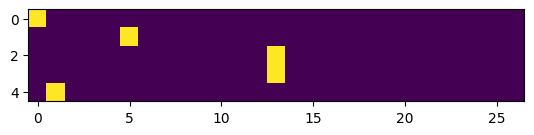

In [212]:
plt.imshow(xenc)


In [213]:
xenc.dtype


torch.float32

In [214]:
W = torch.randn((27, 1))
xenc @ W


tensor([[1.10],
        [0.23],
        [0.30],
        [0.30],
        [0.53]])

In [215]:
logits = xenc @ W  # log-counts
counts = logits.exp()  # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs


tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [216]:
xs


tensor([ 0,  5, 13, 13,  1])

In [217]:
ys


tensor([ 5, 13, 13,  1,  0])

In [218]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(myseed)
W = torch.randn((27, 27), generator=g)


In [219]:
xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
logits = xenc @ W  # predict log-counts
counts = logits.exp()  # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'


In [220]:
probs


tensor([[0.00, 0.03, 0.00, 0.03, 0.03, 0.02, 0.02, 0.01, 0.22, 0.14, 0.04, 0.01, 0.02, 0.04, 0.05, 0.02, 0.05, 0.01, 0.02, 0.07, 0.01, 0.01, 0.03, 0.00, 0.07, 0.01, 0.05],
        [0.01, 0.05, 0.01, 0.04, 0.03, 0.06, 0.02, 0.01, 0.02, 0.03, 0.00, 0.20, 0.02, 0.03, 0.02, 0.03, 0.03, 0.03, 0.01, 0.02, 0.01, 0.03, 0.02, 0.17, 0.04, 0.04, 0.03],
        [0.02, 0.02, 0.01, 0.01, 0.00, 0.04, 0.00, 0.03, 0.03, 0.04, 0.00, 0.03, 0.00, 0.01, 0.04, 0.03, 0.27, 0.11, 0.02, 0.01, 0.00, 0.01, 0.01, 0.01, 0.07, 0.08, 0.09],
        [0.02, 0.02, 0.01, 0.01, 0.00, 0.04, 0.00, 0.03, 0.03, 0.04, 0.00, 0.03, 0.00, 0.01, 0.04, 0.03, 0.27, 0.11, 0.02, 0.01, 0.00, 0.01, 0.01, 0.01, 0.07, 0.08, 0.09],
        [0.06, 0.04, 0.01, 0.04, 0.02, 0.01, 0.01, 0.02, 0.02, 0.02, 0.03, 0.02, 0.17, 0.04, 0.06, 0.02, 0.09, 0.00, 0.04, 0.06, 0.01, 0.01, 0.03, 0.03, 0.05, 0.07, 0.01]])

In [221]:
probs.shape


torch.Size([5, 27])

In [222]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item()  # input character index
    y = ys[i].item()  # label character index
    print("--------")
    print(f"bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})")
    print("input to the neural net:", x)
    print("output probabilities from the neural net:", probs[i])
    print("label (actual next character):", y)
    p = probs[i, y]
    print("probability assigned by the net to the the correct character:", p.item())
    logp = torch.log(p)
    print("log likelihood:", logp.item())
    nll = -logp
    print("negative log likelihood:", nll.item())
    nlls[i] = nll

print("=========")
print("average negative log likelihood, i.e. loss =", nlls.mean().item())


--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.00, 0.03, 0.00, 0.03, 0.03, 0.02, 0.02, 0.01, 0.22, 0.14, 0.04, 0.01, 0.02, 0.04, 0.05, 0.02, 0.05, 0.01, 0.02, 0.07, 0.01, 0.01, 0.03, 0.00, 0.07, 0.01, 0.05])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01918191835284233
log likelihood: -3.953787088394165
negative log likelihood: 3.953787088394165
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.01, 0.05, 0.01, 0.04, 0.03, 0.06, 0.02, 0.01, 0.02, 0.03, 0.00, 0.20, 0.02, 0.03, 0.02, 0.03, 0.03, 0.03, 0.01, 0.02, 0.01, 0.03, 0.02, 0.17, 0.04, 0.04, 0.03])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.031773172318935394
log likelihood: -3.4491329193115234
negative log likelihood: 3.4491329193115234
--------
bigram example 3: mm (indexes 13

In [223]:
xs


tensor([ 0,  5, 13, 13,  1])

In [224]:
ys


tensor([ 5, 13, 13,  1,  0])

In [225]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(myseed)
W = torch.randn((27, 27), generator=g, requires_grad=True)


In [226]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
logits = xenc @ W  # predict log-counts
counts = logits.exp()  # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()


In [227]:
print(loss.item())


3.8139586448669434


In [228]:
# backward pass
W.grad = None  # set to zero the gradient
loss.backward()


In [229]:
W.data += -0.1 * W.grad


In [230]:
# create the dataset
xs, ys = [], []
for w in words:
    chs = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print("number of examples: ", num)

# initialize the 'network'
g = torch.Generator().manual_seed(myseed)
W = torch.randn((27, 27), generator=g, requires_grad=True)


number of examples:  228146


In [231]:
# gradient descent
for k in range(100):  # YOU PROBABLY WANT TO RUN THIS FOR MORE THAN 1 EPOCH

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()  # input to the network: one-hot encoding
    logits = xenc @ W  # predict log-counts
    counts = logits.exp()  # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True)  # probabilities for next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean()
    print(loss.item())

    # backward pass
    W.grad = None  # set to zero the gradient
    loss.backward()

    # update
    W.data += -50 * W.grad


3.7538042068481445
3.380002021789551
3.159393787384033
3.017057418823242
2.9197585582733154
2.8489866256713867
2.795668601989746
2.7544023990631104
2.7219676971435547
2.6961686611175537
2.6753382682800293
2.658186435699463
2.643766403198242
2.631418228149414
2.6206893920898438
2.611260414123535
2.6028966903686523
2.59541916847229
2.5886878967285156
2.5825929641723633
2.577045440673828
2.5719735622406006
2.5673184394836426
2.56303071975708
2.5590689182281494
2.555399179458618
2.5519907474517822
2.5488176345825195
2.545858144760132
2.5430924892425537
2.5405032634735107
2.5380752086639404
2.5357954502105713
2.5336506366729736
2.5316314697265625
2.5297272205352783
2.5279293060302734
2.5262296199798584
2.5246212482452393
2.5230979919433594
2.521653652191162
2.520282745361328
2.518980026245117
2.5177416801452637
2.5165631771087646
2.5154407024383545
2.5143704414367676
2.5133495330810547
2.5123748779296875
2.511444091796875
2.5105538368225098
2.50970196723938
2.5088865756988525
2.508105516433

In [232]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(myseed)

for i in range(5):

    out = []
    ix = 0
    while True:

        # ----------
        # BEFORE:
        # p = P[ix]
        # ----------
        # NOW:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W  # predict log-counts
        counts = logits.exp()  # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True)  # probabilities for next character
        # ----------

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print("".join(out))


s.
teinan.
n.
t.
n.
